<a href="https://colab.research.google.com/github/Pravallika1234uppala/ML/blob/main/ML%20Models/UnSupervised%20Machine%20Learning/Clustering/K%20means%20Clustering%20Algorithm/K_Means_Clustering_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np
%matplotlib inline



In [9]:
X,y=make_blobs(n_samples=1000, centers=3, n_features=2)

#dont consider y and y_train y_test as we are working with clustering.


In [10]:
X, X.shape

(array([[ -7.46007362,  -0.69251536],
        [ 10.27268732,   0.90414942],
        [  7.88237243,  -8.55624994],
        ...,
        [  8.00344208,   0.92463183],
        [  6.43318698, -11.20204122],
        [  9.71735654,   0.39739724]]),
 (1000, 2))

In [11]:
y
#labels

array([0, 2, 1, 0, 1, 0, 2, 1, 2, 2, 2, 1, 2, 0, 0, 1, 0, 0, 0, 2, 2, 2,
       0, 1, 1, 2, 0, 2, 1, 0, 0, 0, 0, 1, 1, 0, 2, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 2, 0, 2, 1, 1, 0, 2, 2, 1, 2, 2, 0, 0, 0, 0, 1, 0, 2, 2, 2,
       0, 0, 1, 0, 2, 0, 0, 2, 0, 0, 0, 2, 2, 2, 0, 2, 2, 1, 2, 0, 2, 1,
       2, 1, 1, 0, 1, 0, 2, 0, 2, 1, 0, 1, 0, 2, 0, 1, 2, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 2, 2, 0, 1, 1, 0, 1, 0, 1, 2, 1, 0, 2, 0, 2, 0, 2, 2,
       2, 2, 1, 1, 0, 2, 0, 0, 0, 0, 2, 0, 0, 2, 2, 1, 2, 0, 2, 0, 1, 1,
       2, 0, 2, 0, 2, 2, 0, 2, 0, 1, 1, 2, 0, 2, 2, 1, 2, 0, 0, 1, 1, 1,
       2, 0, 0, 2, 1, 0, 1, 0, 1, 2, 1, 2, 2, 1, 2, 2, 2, 1, 1, 1, 1, 0,
       0, 2, 0, 1, 1, 1, 2, 1, 0, 2, 1, 1, 1, 1, 0, 1, 1, 1, 2, 0, 1, 0,
       2, 0, 2, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 2, 1, 1, 0, 0,
       1, 0, 2, 1, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 2, 0, 1, 0, 1, 1, 0, 2,
       0, 1, 2, 0, 2, 1, 1, 0, 0, 2, 0, 1, 1, 1, 0, 0, 2, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2,

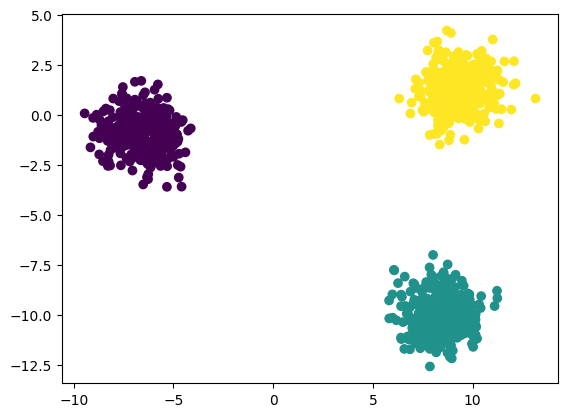

In [15]:
plt.scatter(X[:,0], X[:,1], c=y)

In [16]:
#train test split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42)

In [17]:
#consider only X

#performing scaling
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

In [18]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [19]:
from sklearn.cluster import KMeans

#elbow method - to select k value

#storing diff wcss values
wcss=[]
for k in range(1,12):
  #giving iteration of centroids:
  kmeans_model = KMeans(n_clusters=k, init="k-means++")
  kmeans_model.fit(X_train_scaled)
  wcss.append(kmeans_model.inertia_)

In [20]:
wcss

[1400.0000000000005,
 643.4713012926356,
 38.68204116432451,
 32.649902048792605,
 26.990083800447266,
 21.93873208482568,
 23.634504628456284,
 18.023883769601728,
 16.3463555147918,
 15.713917546037752,
 13.506275101131425]

Text(0, 0.5, 'wcss')

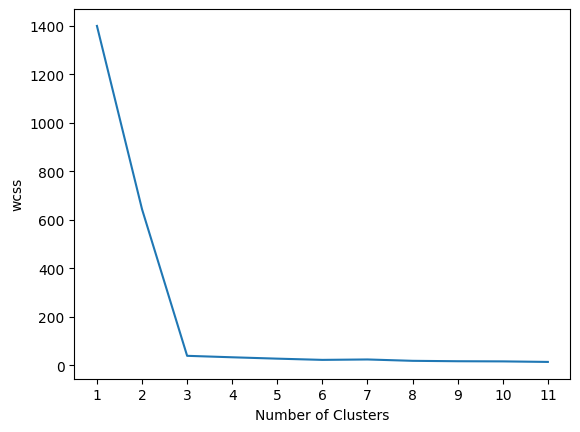

In [21]:
#plotting to find good k value:-elbow curve

plt.plot(range(1,12),wcss)
plt.xticks(range(1,12))
plt.xlabel("Number of Clusters")
plt.ylabel("wcss")

In [22]:
#here k can be 3

kmeans_model=KMeans(n_clusters=3, init="k-means++")

In [23]:
kmeans_model.fit_predict(X_train_scaled)


array([0, 1, 1, 0, 2, 1, 0, 1, 0, 2, 0, 2, 1, 2, 2, 2, 1, 1, 2, 0, 2, 2,
       2, 2, 0, 2, 1, 0, 2, 2, 2, 0, 1, 2, 0, 2, 2, 1, 1, 2, 1, 2, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 2, 0, 1, 2, 2, 0, 2, 0, 2, 1, 1, 2, 1, 1,
       0, 1, 2, 0, 1, 2, 0, 1, 2, 1, 2, 2, 2, 0, 1, 2, 2, 1, 2, 0, 2, 2,
       2, 2, 2, 0, 1, 0, 1, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 2, 0, 1, 0, 2,
       2, 2, 0, 0, 1, 0, 2, 2, 2, 0, 0, 0, 2, 1, 2, 1, 1, 1, 1, 0, 0, 1,
       2, 2, 0, 2, 1, 1, 1, 1, 0, 2, 2, 0, 0, 2, 2, 2, 1, 1, 2, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 2, 0, 0, 2, 2, 2, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 2, 1, 0, 1, 2, 1, 1, 2, 0, 1, 2, 2, 1, 1, 1, 1, 0, 0, 0, 2, 0,
       1, 1, 1, 0, 2, 0, 1, 1, 1, 2, 2, 2, 0, 1, 1, 1, 1, 0, 2, 2, 1, 0,
       1, 2, 1, 0, 2, 0, 2, 1, 1, 0, 2, 1, 0, 1, 2, 2, 1, 0, 0, 2, 2, 0,
       0, 2, 1, 2, 1, 0, 0, 2, 0, 2, 1, 0, 0, 1, 2, 2, 2, 0, 1, 2, 2, 1,
       2, 2, 1, 1, 2, 1, 0, 1, 1, 1, 2, 1, 2, 1, 0, 0, 0, 2, 1, 0, 2, 0,
       2, 1, 1, 1, 1, 0, 2, 1, 0, 2, 1, 1, 2, 2, 0,

In [24]:
y_pred = kmeans_model.predict(X_test_scaled)


In [25]:
y_pred

array([1, 2, 0, 2, 2, 2, 1, 0, 2, 0, 2, 0, 1, 0, 2, 2, 2, 2, 1, 0, 2, 1,
       0, 1, 1, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 1, 2, 0, 2,
       1, 1, 1, 2, 1, 2, 0, 1, 1, 0, 1, 0, 0, 2, 0, 1, 2, 1, 2, 1, 0, 0,
       1, 1, 2, 2, 1, 2, 1, 1, 2, 0, 0, 0, 1, 1, 2, 0, 1, 0, 2, 1, 1, 2,
       2, 1, 1, 1, 0, 1, 0, 0, 1, 2, 2, 0, 0, 0, 1, 2, 0, 1, 1, 0, 2, 2,
       0, 2, 0, 2, 2, 0, 1, 2, 1, 2, 2, 0, 0, 1, 2, 1, 2, 2, 1, 0, 1, 0,
       1, 0, 0, 2, 1, 1, 2, 0, 1, 0, 2, 1, 2, 1, 2, 2, 2, 1, 1, 2, 1, 1,
       1, 2, 2, 0, 0, 2, 1, 1, 0, 0, 0, 2, 2, 1, 0, 0, 0, 1, 1, 2, 0, 0,
       0, 0, 2, 1, 0, 2, 0, 2, 2, 2, 1, 2, 0, 2, 0, 0, 1, 2, 1, 1, 1, 1,
       0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 1, 1, 2, 0, 1, 1, 0, 2, 1, 0, 0, 0,
       2, 2, 2, 1, 1, 1, 0, 0, 0, 0, 2, 0, 1, 2, 1, 0, 1, 2, 2, 2, 0, 2,
       1, 2, 1, 0, 0, 2, 2, 1, 2, 0, 1, 1, 2, 0, 1, 0, 1, 0, 1, 0, 1, 2,
       1, 2, 2, 1, 2, 1, 2, 1, 0, 0, 1, 2, 1, 2, 2, 2, 1, 2, 1, 0, 1, 0,
       2, 1, 0, 2, 0, 2, 0, 1, 2, 1, 0, 0, 1, 0], d

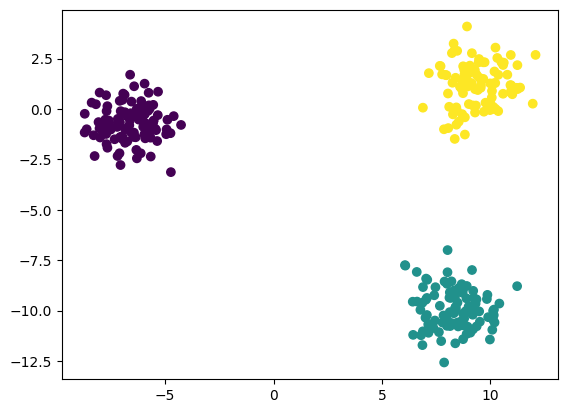

In [26]:
plt.scatter(X_test[:,0],X_test[:,1],c=y_pred)

In [27]:
#Validing the k value
#kneelocator
#silhoutee scoring


In [28]:
#knee locator
!pip install kneed

In [30]:
from kneed import KneeLocator

k1=KneeLocator(range(1,12),wcss,curve="convex",direction="decreasing")


In [31]:
k1.elbow

3

In [33]:
#validating k value is same as we found throyugh elbow method by our observation,

#silhoutte score
from sklearn.metrics import silhouette_score

silhouette_coefficients=[]

for k in range(2,11):
  kmeans_model=KMeans(n_clusters=k, init="k-means++")
  kmeans_model.fit(X_train_scaled)
  score=silhouette_score(X_train_scaled, kmeans_model.labels_)
  silhouette_coefficients.append(score)



In [34]:
silhouette_coefficients

[0.6219983972495197,
 0.8666932058044929,
 0.7060153162101329,
 0.5524472071895383,
 0.3763120194263104,
 0.36686763858379584,
 0.3236881902746216,
 0.34478932251101696,
 0.36746999491876214]

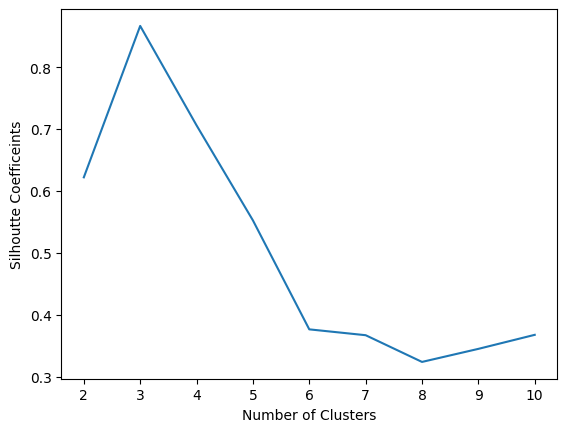

In [36]:

plt.plot(range(2,11),silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhoutte Coefficeints")
plt.show()

In [37]:
#here k =3 have high silhoutte score